<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/simulator1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

RISCA

# Install Dependencies

In [1]:
%pip install numpy matplotlib seaborn pandas
!git clone https://github.com/lin-k23/SAR_ADC.git

%cd SAR_ADC/script/
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser import AnalyserSar
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


Cloning into 'SAR_ADC'...


h:\RISCA\SAR_ADC\script


## Initialize Objects and Pass Configuration Information

In [2]:
mdl = preset_mdl()
pr = preset_pr()

Loading file: ..\config\sar\timing_table.xlsx
[util.load_assembler_xlsx] TI parameter loaded: pr["TI"]= 1
Loaded Excel configuration:


In [4]:
%pwd

'h:\\RISCA\\SAR_ADC\\script'

In [5]:
# 把pr["conf_name"]和path_config拼接起来，得到配置文件的路径
from util.load_assembler_xlsx import load_assembler_xlsx
path_config = "..\\config\\"
config_file_path = f"{path_config}{pr['conf_name']}\\"

# 调用 load_assembler_xlsx 函数加载配置文件
# pr_loaded = load_assembler_xlsx(path_config, pr["conf_name"], "timing_table")
pr_loaded = load_assembler_xlsx(config_file_path)

# update pr with pr_loaded
pr.update(pr_loaded)

# 打印读取到的 Excel 配置文件
if "T_assembler" in pr:
    print("Loaded Excel configuration:")

Loading file: ..\config\sar\timing_table.xlsx
[util.load_assembler_xlsx] TI parameter loaded: pr["TI"]= 1
Loaded Excel configuration:


In [ ]:
# pr['conf_name'] = input('配置文件名: sar/tisar/nssar1o1c/noisar1o1ccp/pipesar2s/...')
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

## Input signal & Analysis conversion results

In [3]:
# 定义输入信号峰值
v_in_peak = [0.85, 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)

# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

## Run Analysis

offset_nocal = 7.81 LSB


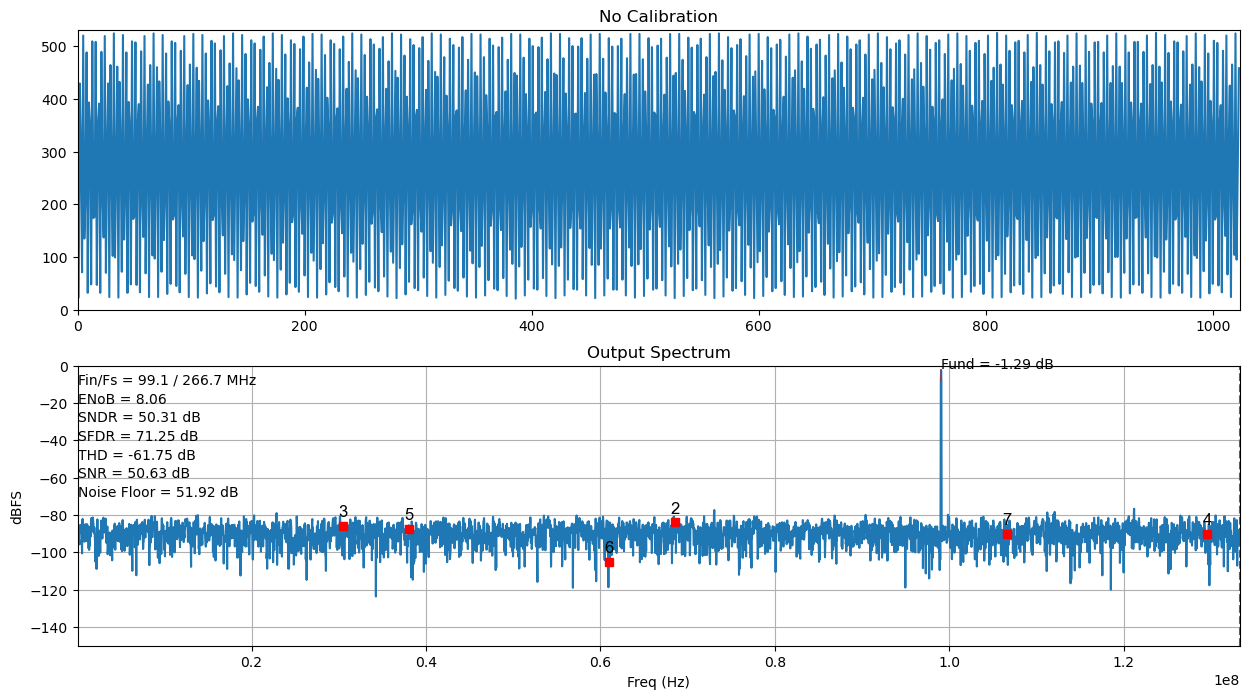

In [4]:
test = AnalyserSar(da, pr)
test.no_calibration()